## Binary Classification
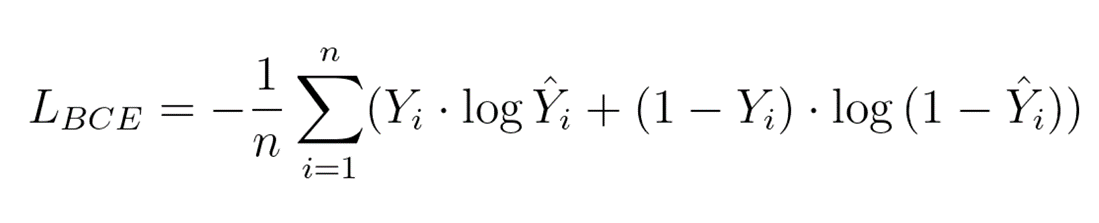

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [2]:
import pandas as pd 
df=pd.read_csv('train_booking.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

### Check missing values

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Duplicate values

In [5]:
df.duplicated().sum()

0

### Seperate X and Y

In [6]:
X=df.drop(columns=['id','booking_status'])
Y=df[['booking_status']]

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [9]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

In [10]:
Y.value_counts()/len(Y)

booking_status
0                 0.607981
1                 0.392019
Name: count, dtype: float64

In [11]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

### Preprocessing pipeline for X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.99805198, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.87015314, -0.73769133],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -1.41540612, -0.73769133],
       ...,
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.2306589 , -0.73769133],
       [-1.75392524, -0.31345354, -0.99881361, ..., -0.10147907,
         0.41556686, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -1.06536717, -0.73769133]])

In [15]:
cols = num_pipe.get_feature_names_out()
cols


array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [18]:
xtrain.shape

(33680, 17)

In [19]:
xtest.shape

(8420, 17)

In [20]:
ytrain.value_counts()

booking_status
0                 20446
1                 13234
Name: count, dtype: int64

In [21]:
ytrain.value_counts()/len(ytrain)

booking_status
0                 0.607067
1                 0.392933
Name: count, dtype: float64

In [22]:
ytest.value_counts()

booking_status
0                 5150
1                 3270
Name: count, dtype: int64

In [23]:
ytest.value_counts()/len(ytest)

booking_status
0                 0.611639
1                 0.388361
Name: count, dtype: float64

### Create a neural Network
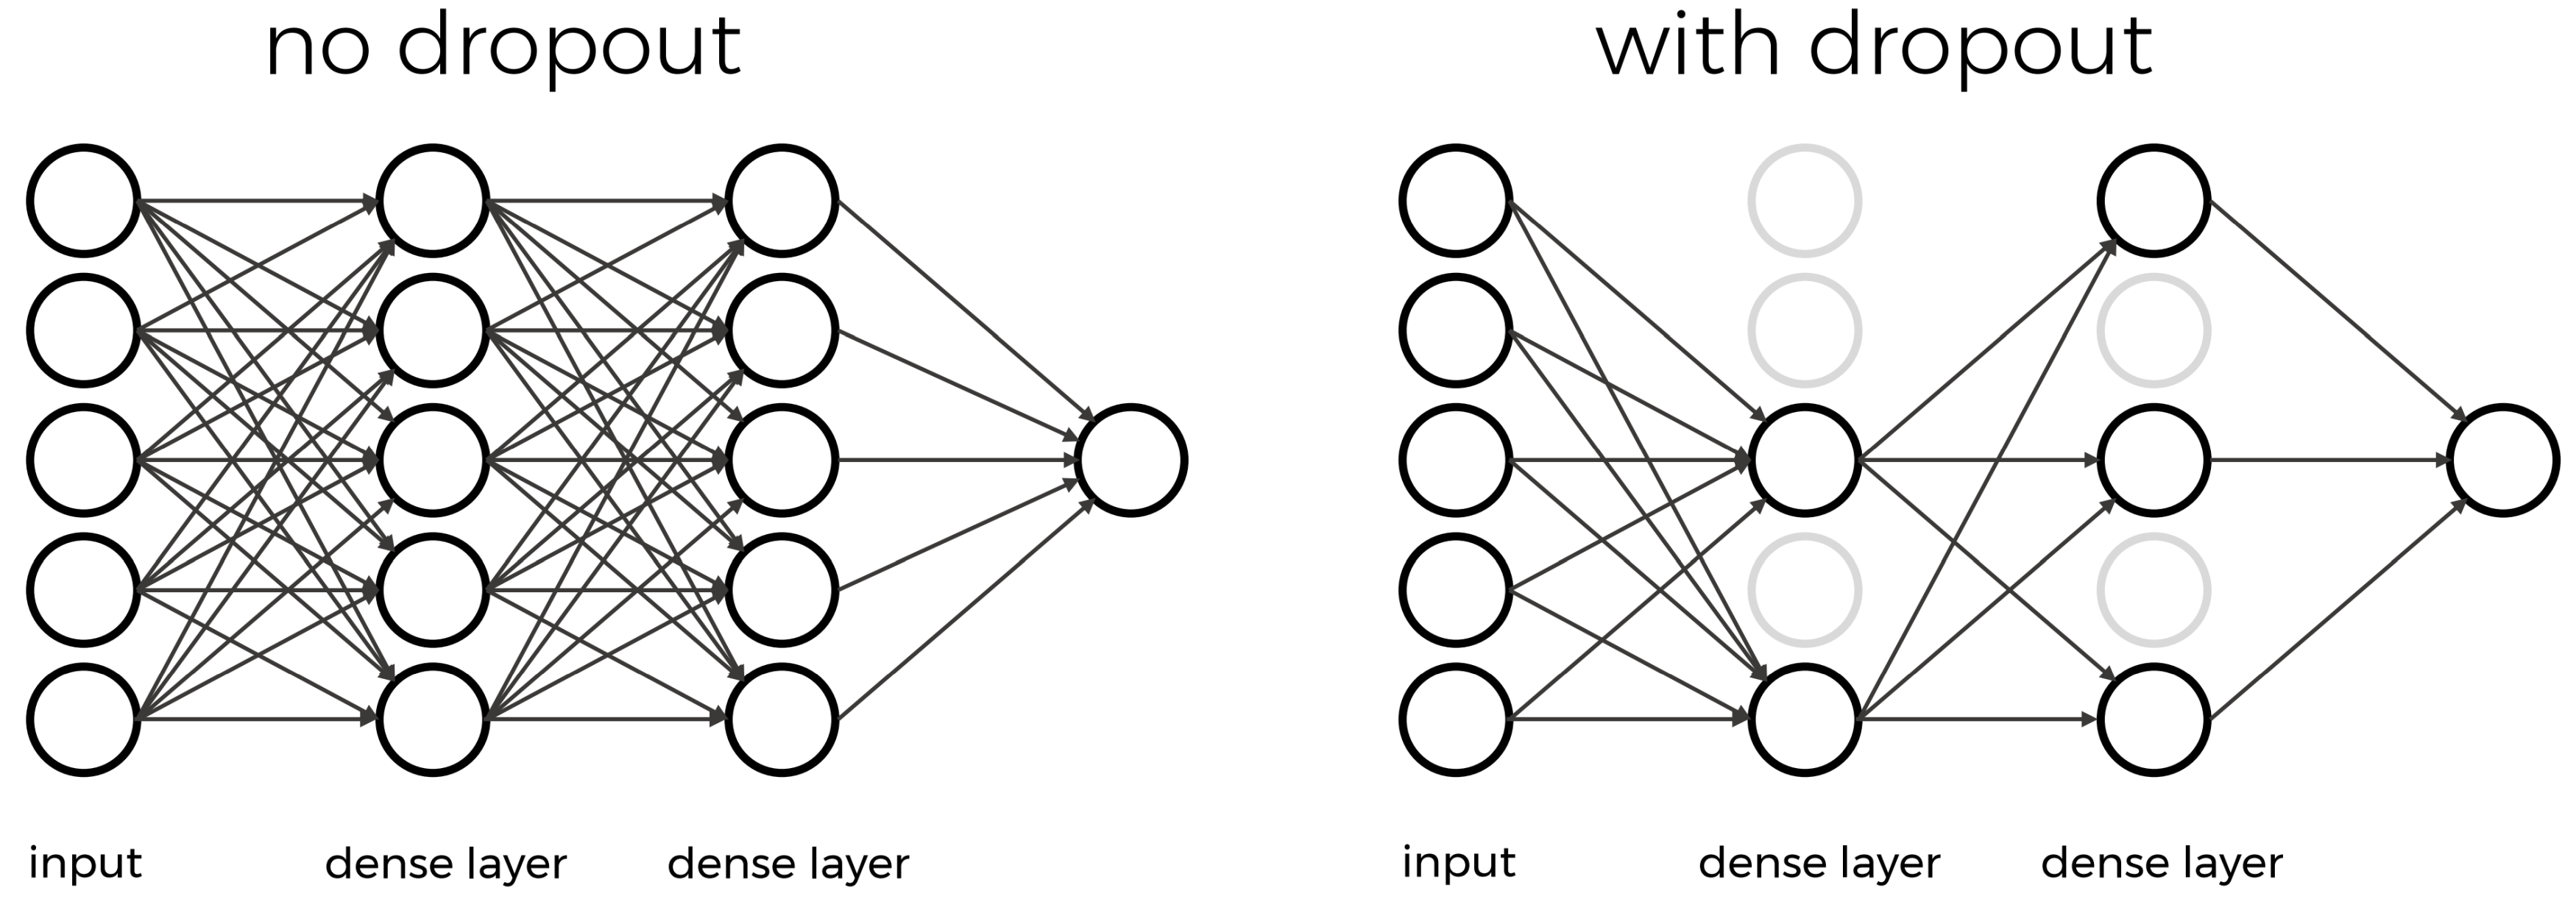

In [24]:
xtrain.shape[1]

17

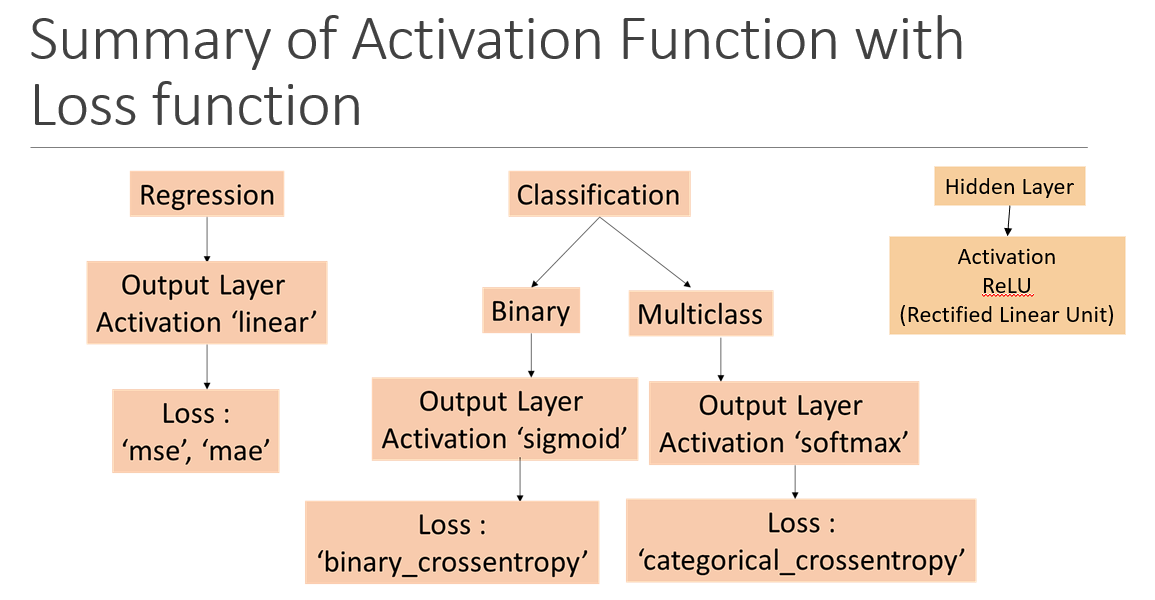

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [26]:
model = Sequential()

# Hidden layer 1
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
# Dropout Layer 1
model.add(Dropout(0.4))
# Hidden Layer 2
model.add(Dense(32, activation='relu'))
# Dropout Layer 2
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile model

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

### Train the model


In [29]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


842/842 [==============================] - 7s 4ms/step - loss: 0.5346 - accuracy: 0.7305 - auc: 0.7936 - val_loss: 0.4788 - val_accuracy: 0.7711 - val_auc: 0.8432
Epoch 2/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4874 - accuracy: 0.7700 - auc: 0.8361 - val_loss: 0.4743 - val_accuracy: 0.7751 - val_auc: 0.8470
Epoch 3/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4786 - accuracy: 0.7771 - auc: 0.8427 - val_loss: 0.4703 - val_accuracy: 0.7788 - val_auc: 0.8510
Epoch 4/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4737 - accuracy: 0.7801 - auc: 0.8465 - val_loss: 0.4666 - val_accuracy: 0.7787 - val_auc: 0.8531
Epoch 5/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.7814 - auc: 0.8493 - val_loss: 0.4659 - val_accuracy: 0.7809 - val_auc: 0.8544
Epoch 6/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4683 - accuracy: 0.7843 - auc: 0.8509 - val_lo

### Learning curve

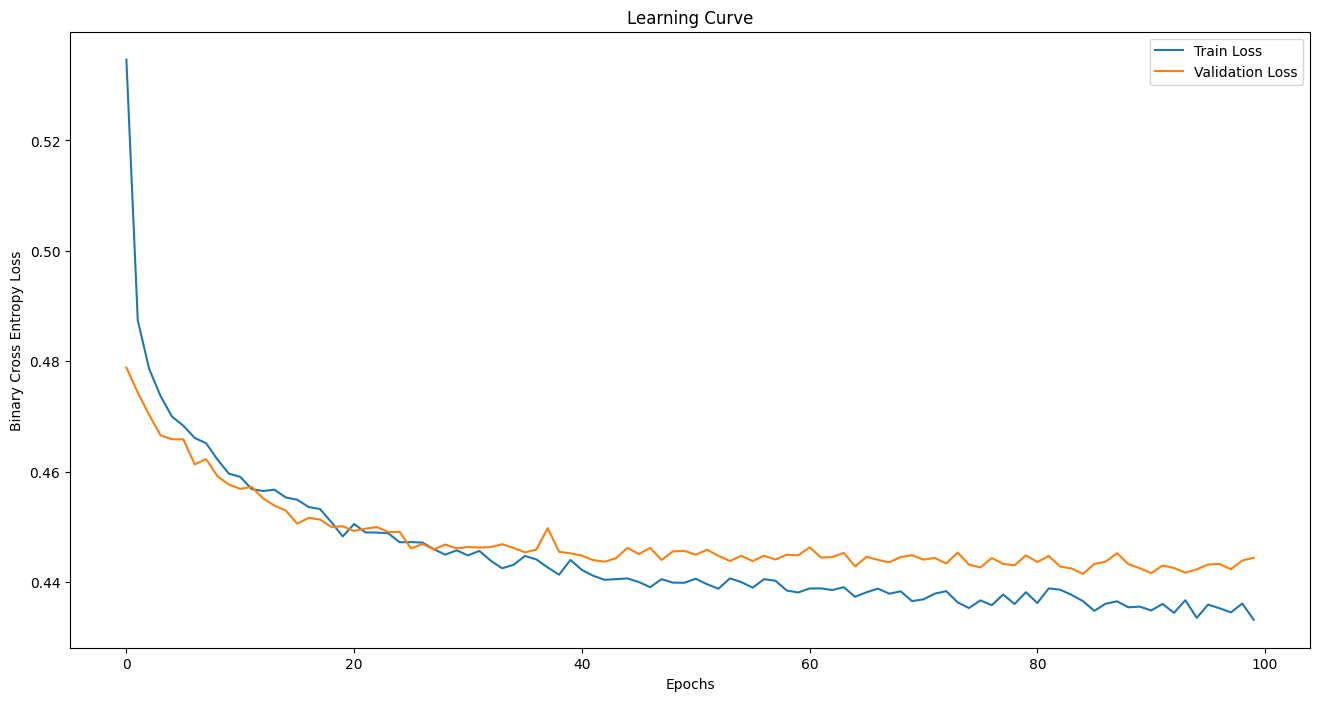

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model

In [31]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4195 - accuracy: 0.8122 - auc: 0.8847


[0.41950252652168274, 0.8122327923774719, 0.8846556544303894]

In [32]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8062 - auc: 0.8772


[0.43139636516571045, 0.8061757683753967, 0.8772033452987671]

### Predict Probability for train and test

In [33]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


In [34]:
yprob_tr[0:5]

array([[0.00650804],
       [0.13630314],
       [0.75687027],
       [0.7698875 ],
       [0.8322939 ]], dtype=float32)

In [35]:
yprob_ts[0:5]

array([[0.04692613],
       [0.869185  ],
       [0.35275596],
       [0.01480461],
       [0.20131569]], dtype=float32)

### Making predictions
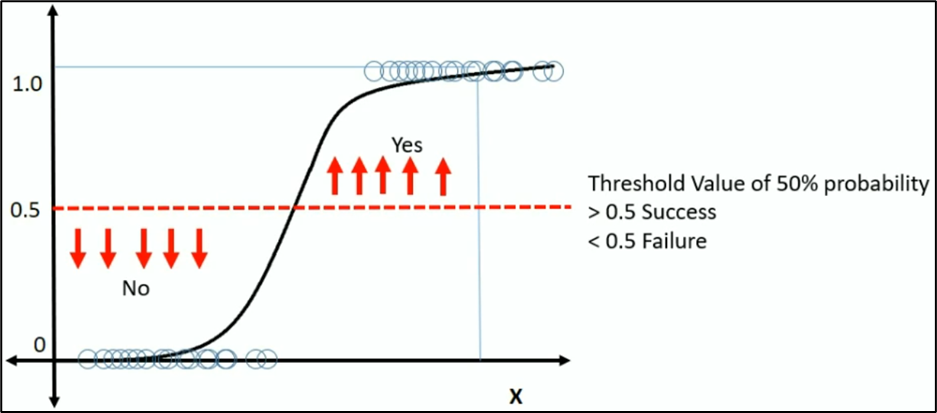

In [36]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]

In [37]:
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [38]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [39]:
ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [40]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


### Plot confusion matrix for test

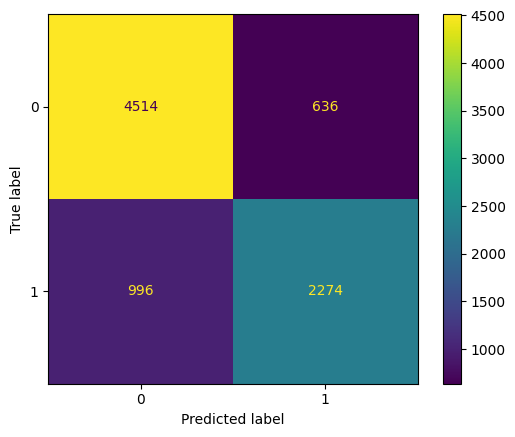

In [41]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

### Print Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5150
           1       0.78      0.70      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.80      0.81      0.80      8420



##

## Save the model for future use 

In [43]:
model.save('bookingModel.keras')

### Loading a model

In [44]:
from keras.models import load_model
nn=load_model('bookingModel.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predict on out of sample data

In [45]:
xnew=pd.read_csv('test_booking.csv')

In [46]:
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [47]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

### Drop statistically insignificant columns

In [48]:
xnew1=xnew.drop(columns=['id'])
xnew1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [49]:
xnew.shape

(28068, 18)

### Transform the new data with num_pipe

In [50]:
xnew_pre = num_pipe.transform(xnew1)
xnew_pre

array([[ 2.05600472, -0.31345354,  0.13025905, ..., -0.10147907,
         0.29709213,  1.84284918],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 0.15103974,  4.12977678, -0.99881361, ..., -0.10147907,
         3.64669564,  0.55257892],
       ...,
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 2.05600472, -0.31345354, -0.99881361, ..., -0.10147907,
         1.56665649, -0.73769133],
       [ 0.15103974, -0.31345354,  1.25933171, ..., -0.10147907,
        -0.54542469, -0.73769133]])

In [51]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


### Predict the probability

In [52]:
probs=model.predict(xnew_pre)
probs

204/878 [=====>........................] - ETA: 1s

878/878 [==============================] - 2s 2ms/step


array([[0.07875928],
       [0.03023241],
       [0.31371507],
       ...,
       [0.18525524],
       [0.41968396],
       [0.72215813]], dtype=float32)

In [53]:
predict_class=lambda x :1 if x>=0.5 else 0

In [54]:
predict_class(0.6)

1

In [55]:
predict_class(0.45)

0

In [56]:
preds=list(map(predict_class,probs))
preds[0:5]

[0, 0, 0, 0, 1]

###   Save prediction and probabiilty in dataframe

In [57]:
df_final=xnew[['id']]

In [58]:
df_final

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [59]:
df_final['booking_status_pred']= preds 
df_final['Probability']=probs

In [60]:
df_final

,id,booking_status_pred,Probability
0,42100,0,0.078759
1,42101,0,0.030232
2,42102,0,0.313715
3,42103,0,0.187451
4,42104,1,0.602656
...,...,...,...
28063,70163,1,0.962359
28064,70164,0,0.053400
28065,70165,0,0.185255
28066,70166,0,0.419684


In [61]:
df_final['booking_status_pred'].value_counts()

booking_status_pred
0    18478
1     9590
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for booking status'}, xlabel='booking_status_pred'>

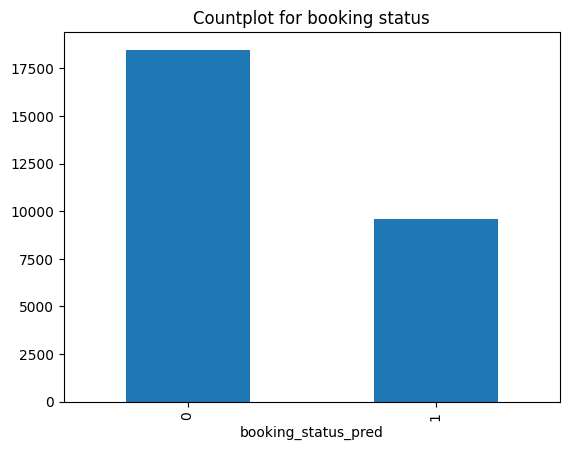

In [62]:
df_final['booking_status_pred'].value_counts().plot(kind='bar',title='Countplot for booking status')

### Save the file as csv

In [63]:
df_final.to_csv('BookingResults.csv',index=False)